# Stock Price Prediction - Time Series Model

![Stock Price](https://i.postimg.cc/rscKQdHm/Black-and-White-Modern-Stock-Market-Presentation.jpg)

## Objective
To predict the stock price of the New Germany Fund (GF) and forecast its closing price for the next five trading days.

## Summary Objectives
- To analyze historical stock price data and detect underlying patterns.
- To implement time series forecasting techniques using `statsmodels.tsa.api` and `statsmodels.api`.
- To evaluate the accuracy and reliability of different forecasting models.

## Methodology
The project will utilize historical stock price data, which will undergo preprocessing, including handling missing values, stationarity checks, and feature engineering. The following models will be implemented:

- **Autoregressive Integrated Moving Average (ARIMA)** – A traditional statistical approach for time series forecasting.
- **Seasonal ARIMA (SARIMA)** – An extension of ARIMA that accounts for seasonality in stock prices.
- **Vector Autoregression (VAR)** – A multivariate time series forecasting method to analyze interdependencies between stocks.
- **Exponential Smoothing State Space Model (ETS)** – A smoothing-based approach for short-term stock price forecasting.

Performance will be evaluated using metrics like:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)

## Expected Outcomes
- A robust predictive model for forecasting the stock price of the New Germany Fund (GF).
- Identification of key trends and seasonality patterns affecting stock movements.
- A comparative analysis of different statsmodels-based forecasting models.

## Conclusion
This project will contribute to the understanding of stock market trends by leveraging time series forecasting techniques, providing a valuable tool for investors and financial analysts.

## Recommendations
Future work can focus on:
- Incorporating external economic indicators to improve model accuracy.
- Exploring deep learning-based time series forecasting methods such as LSTMs.
- Developing a real-time stock price prediction dashboard.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from itertools import product
from tqdm.notebook import tqdm  # tqdm_notebook is deprecated, use tqdm instead



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_path = r"C:\Users\LENOVO\Documents\DS_AI_ML_Projects\stock_prices_sample.csv"
df = pd.read_csv(file_path, index_col=['DATE'], parse_dates=['DATE'])

In [3]:
df.head(10)

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.2300,47.3700,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.1400,46.4800,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.1600,46.4100,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.8700,18.8700,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.7900,18.8100,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.7600,18.5800,18.7400,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.5200,18.3012,18.4900,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.6780,18.4700,18.6500,22633.0,18.470000,18.678000,18.470000,18.650000,22633.0,NaN,0.0,1.0
2018-05-29,GF,BBG000C3C6S2,EOD,daily,18.51,18.5100,18.1500,18.2562,67412.0,18.510000,18.510000,18.150000,18.256200,67412.0,NaN,0.0,1.0


Clean the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2013-01-04 to 2014-06-23
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       999 non-null    object 
 1   FIGI         999 non-null    object 
 2   TYPE         999 non-null    object 
 3   FREQUENCY    999 non-null    object 
 4   OPEN         999 non-null    float64
 5   HIGH         999 non-null    float64
 6   LOW          999 non-null    float64
 7   CLOSE        999 non-null    float64
 8   VOLUME       999 non-null    float64
 9   ADJ_OPEN     999 non-null    float64
 10  ADJ_HIGH     999 non-null    float64
 11  ADJ_LOW      999 non-null    float64
 12  ADJ_CLOSE    999 non-null    float64
 13  ADJ_VOLUME   999 non-null    float64
 14  ADJ_FACTOR   7 non-null      float64
 15  EX_DIVIDEND  999 non-null    float64
 16  SPLIT_RATIO  999 non-null    float64
dtypes: float64(13), object(4)
memory usage: 140.5+ KB


In [5]:
df.shape

(999, 17)

In [6]:
df.dtypes

TICKER          object
FIGI            object
TYPE            object
FREQUENCY       object
OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
VOLUME         float64
ADJ_OPEN       float64
ADJ_HIGH       float64
ADJ_LOW        float64
ADJ_CLOSE      float64
ADJ_VOLUME     float64
ADJ_FACTOR     float64
EX_DIVIDEND    float64
SPLIT_RATIO    float64
dtype: object

In [7]:
df = df[df.TICKER != 'GEF']
df = df[df.TYPE != 'Intraday']

In [8]:
df.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.890,18.7900,18.8100,39095.0,18.86,18.890,18.7900,18.8100,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.760,18.5800,18.7400,17468.0,18.58,18.760,18.5800,18.7400,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.520,18.3012,18.4900,22384.0,18.52,18.520,18.3012,18.4900,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.678,18.4700,18.6500,22633.0,18.47,18.678,18.4700,18.6500,22633.0,NaN,0.0,1.0
2018-05-29,GF,BBG000C3C6S2,EOD,daily,18.51,18.510,18.1500,18.2562,67412.0,18.51,18.510,18.1500,18.2562,67412.0,NaN,0.0,1.0


Removing unwanted entries

In [9]:
# Remove unwanted columns, as we solely want to focus on the stock’s closing price.
drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
df.drop(drop_cols, axis=1, inplace=True)

In [10]:
df.head()

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.890,18.7900,18.8100
2018-06-01,GF,18.58,18.760,18.5800,18.7400
2018-05-31,GF,18.52,18.520,18.3012,18.4900
2018-05-30,GF,18.47,18.678,18.4700,18.6500
2018-05-29,GF,18.51,18.510,18.1500,18.2562


Exploratory data analysis (EDA)

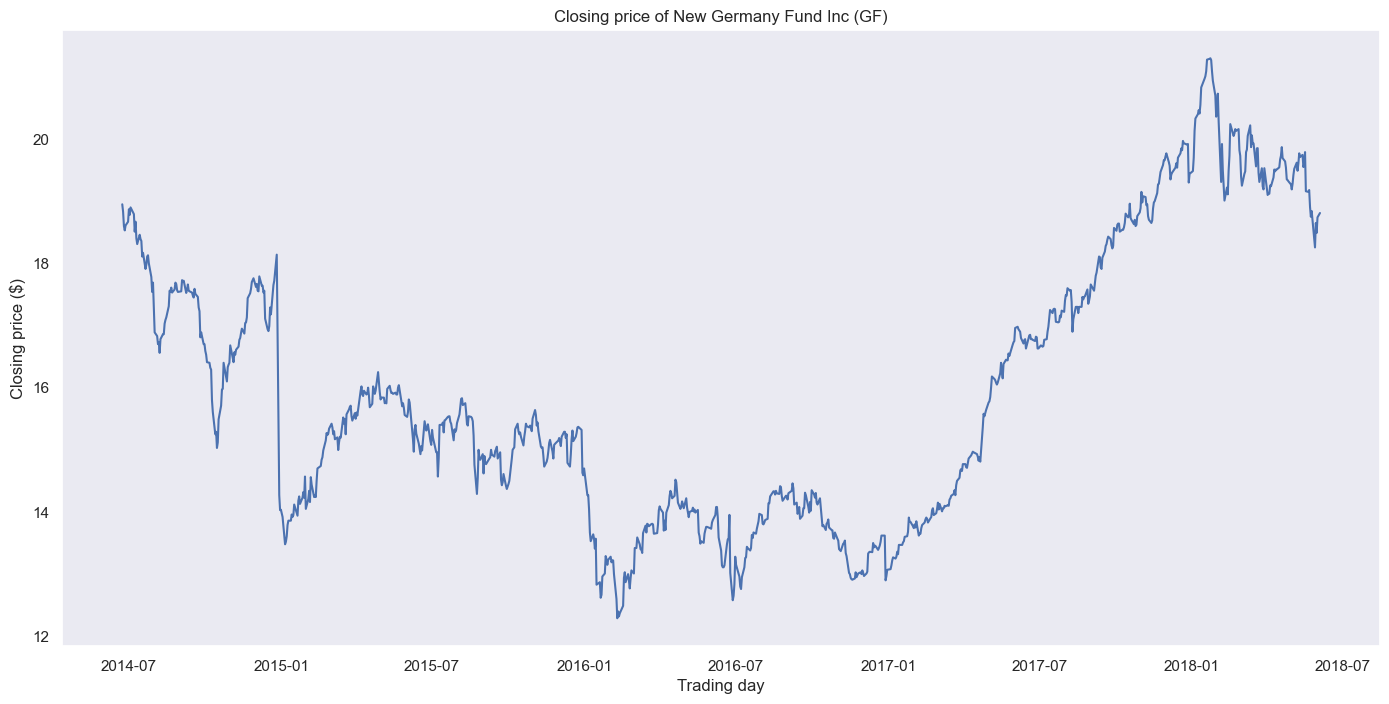

In [11]:
plt.figure(figsize=(17, 8))
plt.plot(df.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

Clearly, this is not a stationary process, and it’s hard to tell if there is some kind of seasonality

**Moving average**

Let’s use the moving average model to smooth our time series. For that, 

we’ll rely on a helper function that will run the moving average model

over a specified time window, and it will plot the result smoothed curve:

In [12]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

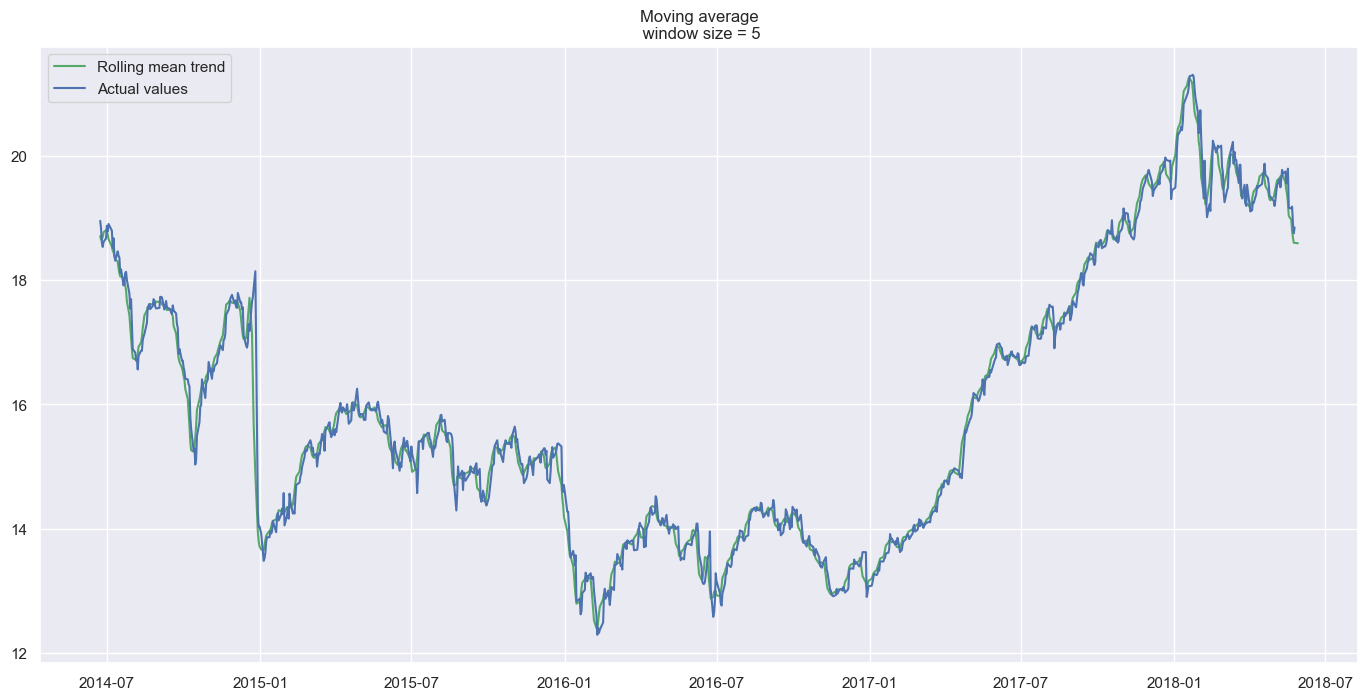

In [13]:
#Smooth by the previous 5 days (by week)
plot_moving_average(df.CLOSE, 5)

Using a time window of five days, we get:

We can hardly see a trend because it’s too close to the actual curve.

Let’s smooth by the previous month, and previous quarter to compare the results.

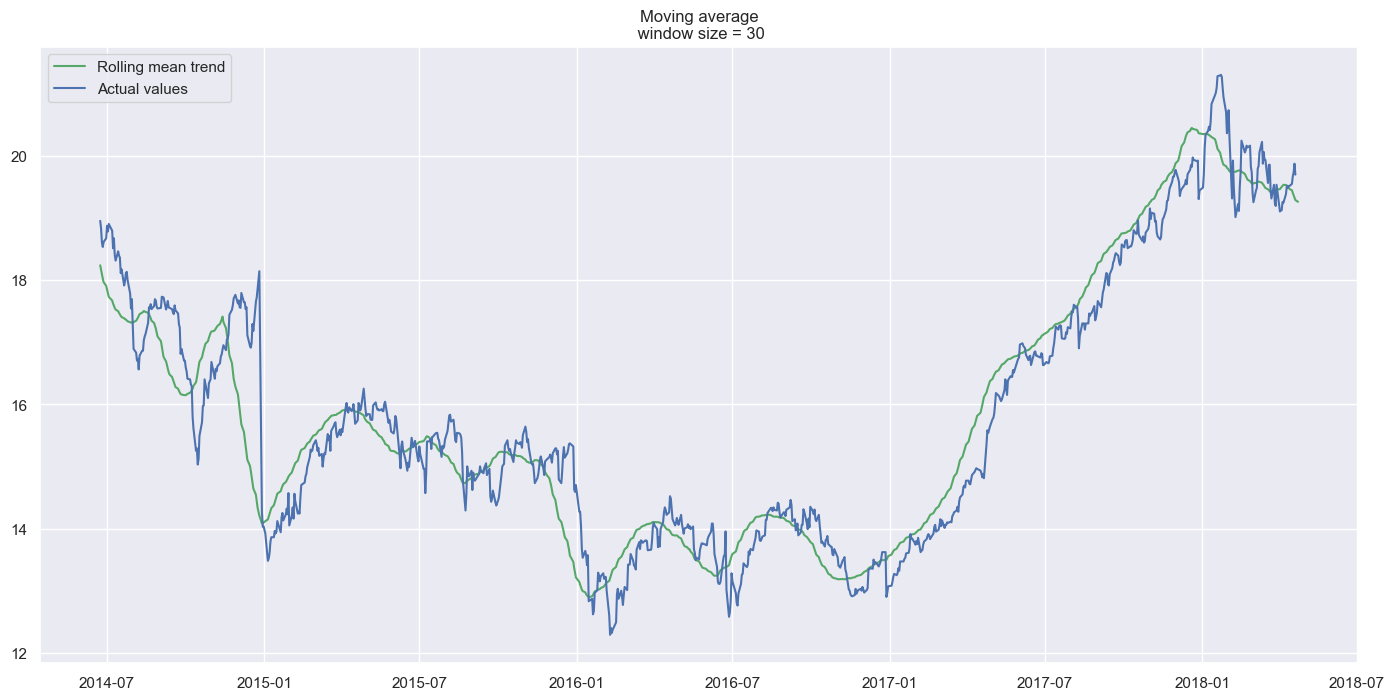

In [14]:
#Smooth by the previous month (30 days)
plot_moving_average(df.CLOSE, 30)

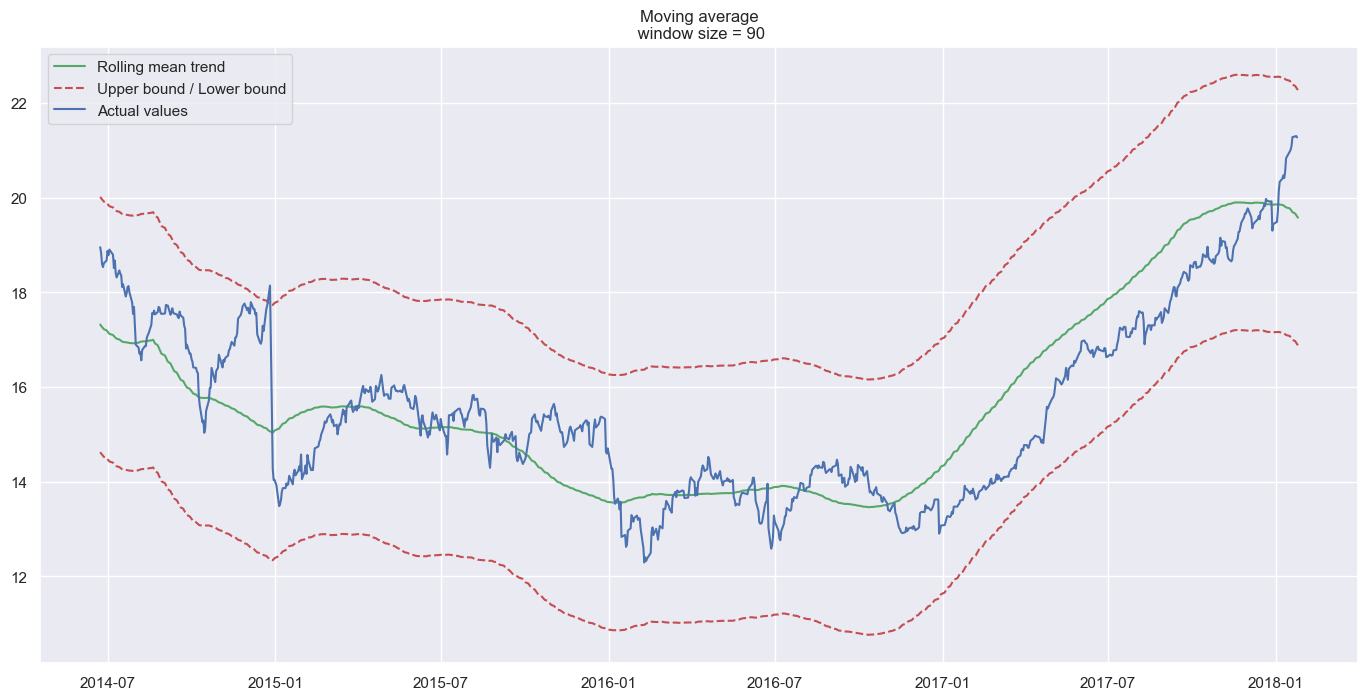

In [15]:
#Smooth by previous quarter (90 days)
plot_moving_average(df.CLOSE, 90, plot_intervals=True)

Trends are easier to spot now. Notice how the 30-day and 90-day trends

show a downward curve at the end. This might mean that the stock is likely to go down in the following days.

**Exponential smoothing**

let’s use exponential smoothing to see if it can pick up a better trend.

In [16]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [17]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

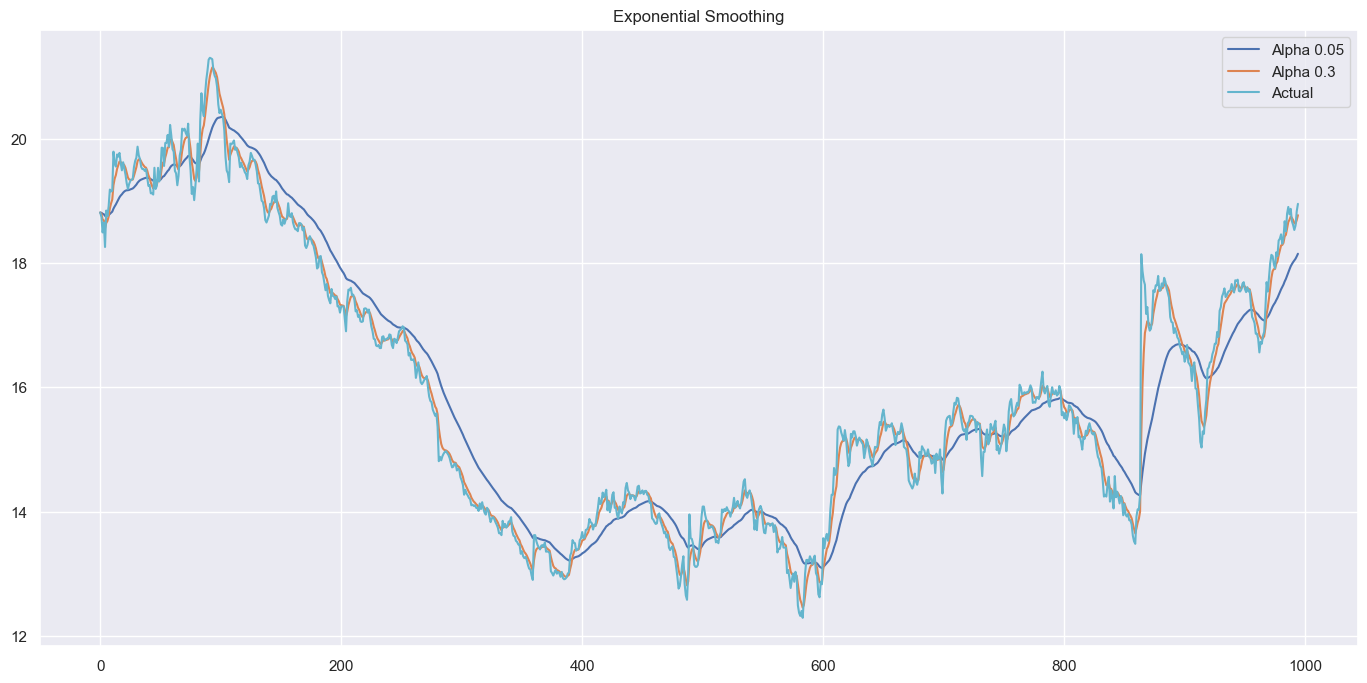

In [18]:
plot_exponential_smoothing(df.CLOSE, [0.05, 0.3])

we use 0.05 and 0.3 as values for the smoothing factor. Feel free to try other values and see what the results are.

As you can see, an alpha value of 0.05 smoothed the curve while picking up most of the upward and downward trends.

Maybe lets double the exponential smoothing.

**Double Exponential Smoothing**

In [19]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [20]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

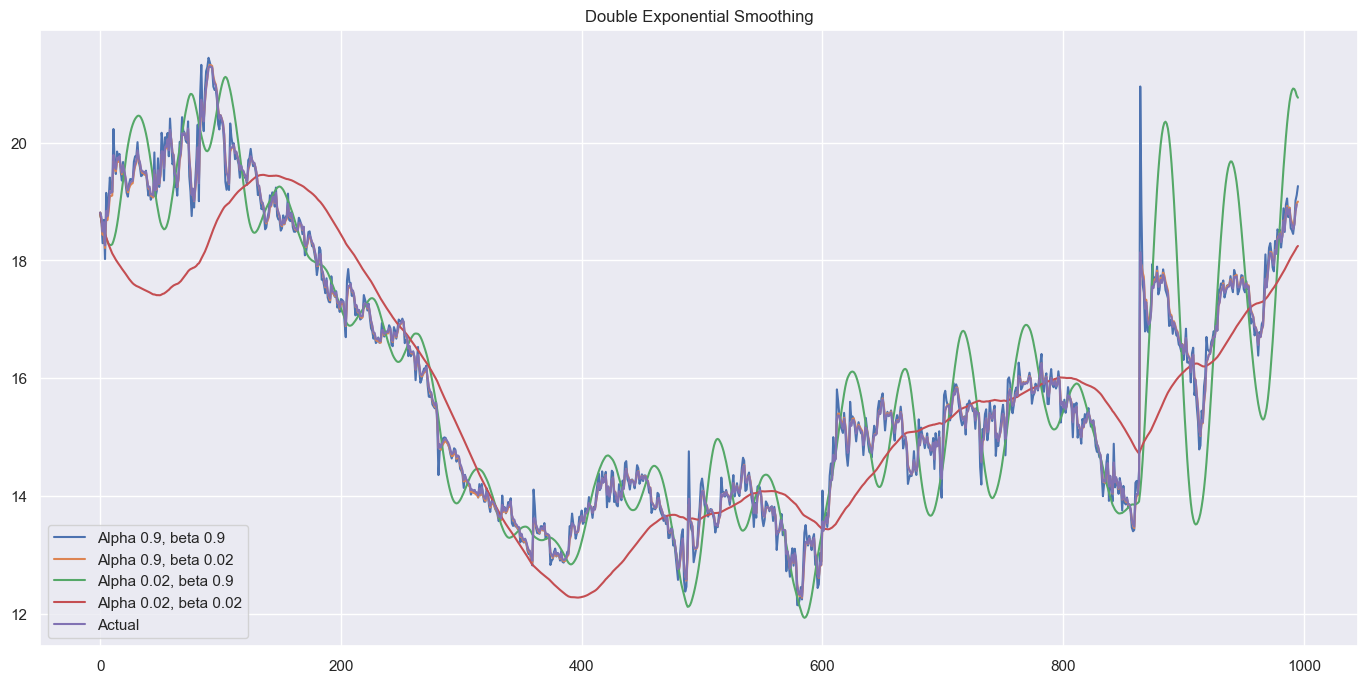

In [21]:
plot_double_exponential_smoothing(df.CLOSE, alphas=[0.9, 0.02], betas=[0.9, 0.02])

Repeat, experiment with different alpha and beta combinations to get better-looking curves.

## Modeling

**Stationarity**
As outlined previously, we must turn our series into a stationary process in order to model it. 

Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process:

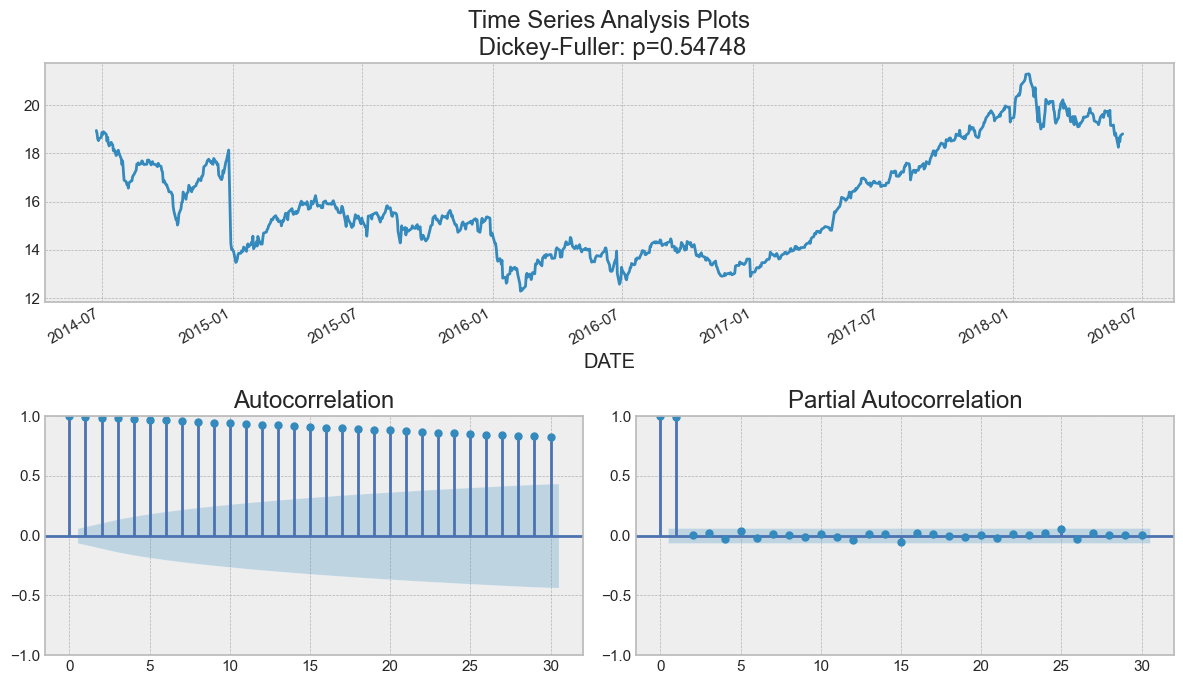

In [22]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df.CLOSE, lags=30)

By the Dickey-Fuller test, the time series is unsurprisingly non-stationary. 

Also, looking at the autocorrelation plot, we see that it’s very high, and it seems that there’s no clear seasonality.

To get rid of the high autocorrelation and make the process stationary, let’s take the first difference. We simply subtract the time series from itself with a lag of one day, and we get:

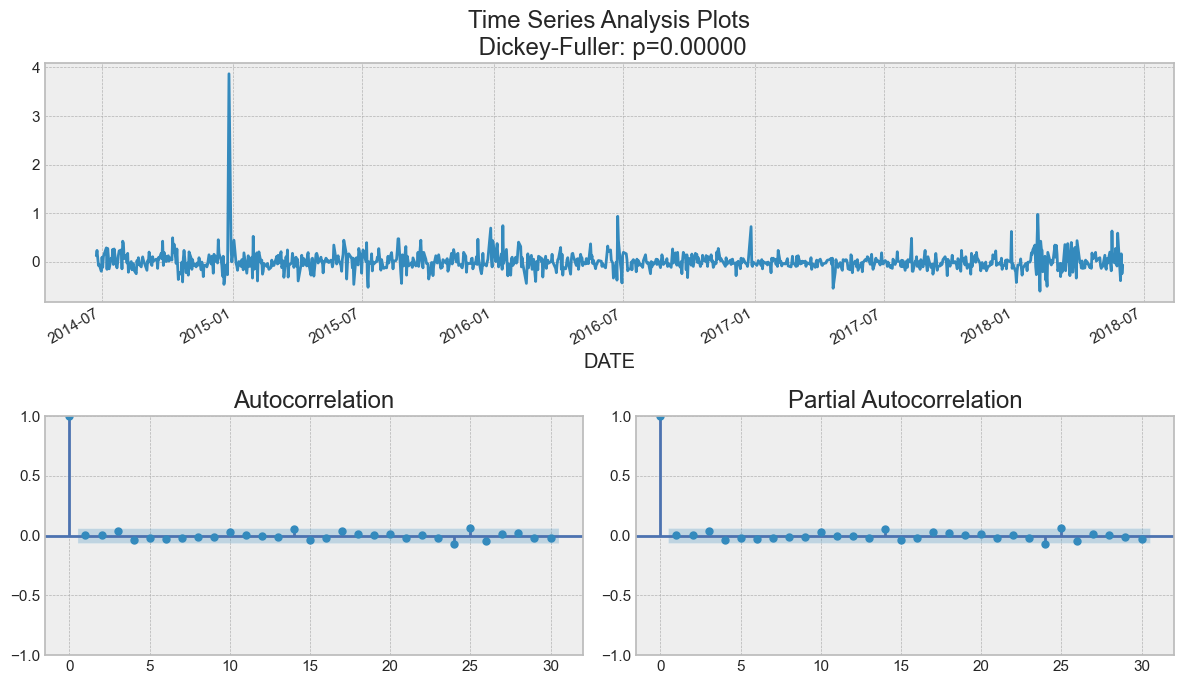

In [23]:
df_diff = df.CLOSE - df.CLOSE.shift(1)

tsplot(df_diff[1:], lags=30)

Our series is now stationary, and we can start modeling.

## SARIMA

In [24]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [26]:
df['CLOSE'] = pd.to_numeric(df['CLOSE'], errors='coerce')

In [31]:


# Function to optimize SARIMA parameters
def optimize_SARIMA(parameters_list, d, D, s, df):
    """
    Return dataframe with parameters and corresponding AIC
    
    parameters_list - list with (p, q, P, Q) tuples
    d - integration order
    D - seasonal integration order
    s - length of season
    df - time series dataframe with a 'CLOSE' column
    """
    
    results = []
    best_aic = float('inf')
    best_model = None
    best_param = None
    
    for param in tqdm(parameters_list, desc="Optimizing SARIMA"):
        try:
            model = sm.tsa.statespace.SARIMAX(df['CLOSE'], 
                                              order=(param[0], d, param[1]),
                                              seasonal_order=(param[2], D, param[3], s)).fit()
        except:
            continue  # Skip models that fail to fit
        
        aic = model.aic

        # Save the best model
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        
        results.append([param, aic])
    
    # Convert results to a DataFrame
    result_table = pd.DataFrame(results, columns=['parameters', 'aic'])
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table, best_model, best_param

# Run optimization
result_table, best_model, best_param = optimize_SARIMA(parameters_list, d, D, s, df)

# Extract best parameters
p, q, P, Q = best_param

# Fit the final best model
best_model = sm.tsa.statespace.SARIMAX(df['CLOSE'], 
                                       order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit()

# Display the model summary
print(best_model.summary())


Optimizing SARIMA: 100%|██████████| 625/625 [1:36:31<00:00,  9.27s/it]


                                         SARIMAX Results                                         
Dep. Variable:                                     CLOSE   No. Observations:                  995
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2, 3], 5)   Log Likelihood                 148.874
Date:                                   Sat, 08 Feb 2025   AIC                           -283.748
Time:                                           15:26:53   BIC                           -249.471
Sample:                                                0   HQIC                          -270.714
                                                   - 995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.5671      0.139     -4.067      0.000    

Now, for SARIMA, we first need to define a few parameters and a range of values for other parameters to generate a list of all possible combinations of p, q, d, P, Q, D, s.

Now, in the code cell above, we have 625 different combinations. We will try each combination and train SARIMA with each to find the best-performing model. This might take a while depending on your computer’s processing power.

Once this is done, we’ll print out a summary of the best model

We can finally predict the closing price of the next five trading days and evaluate the mean absolute percentage error (MAPE) of the model.

In this case, we have a MAPE of 0.79 percent, which is very good.

In [32]:
#Set parameters that give the lowest AIC (Akaike Information Criteria)

p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(df.CLOSE, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                     CLOSE   No. Observations:                  995
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2, 3], 5)   Log Likelihood                 148.874
Date:                                   Sat, 08 Feb 2025   AIC                           -283.748
Time:                                           15:55:08   BIC                           -249.471
Sample:                                                0   HQIC                          -270.714
                                                   - 995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.5671      0.139     -4.067      0.000    

In [34]:
def plot_SARIMA(series, model, n_steps):
    """
        Plot model vs predicted values
        
        series - dataset with time series
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
    """
    
    df = series.copy().rename(columns = {'CLOSE': 'actual'})
    df['arima_model'] = model.fittedvalues
    #Make a shift on s+d steps, because these values were unobserved by the model due to the differentiating
    df['arima_model'][:s+d] = np.NaN
    
    #Forecast on n_steps forward
    forecast = model.predict(start=df.shape[0], end=df.shape[0] + n_steps)
    forecast = df.arima_model.append(forecast)
    #Calculate error
    error = mean_absolute_percentage_error(df['actual'][s+d:], df['arima_model'][s+d:])
    
    plt.figure(figsize=(17, 8))
    plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error))
    plt.plot(forecast, color='r', label='model')
    plt.axvspan(df.index[-1], forecast.index[-1],alpha=0.5, color='lightgrey')
    plt.plot(df, label='actual')
    plt.legend()
    plt.grid(True);
    
# plot_SARIMA(data, best_model, 5)
print(best_model.predict(start=df.CLOSE.shape[0], end=df.CLOSE.shape[0] + 5))
print(mean_absolute_percentage_error(df.CLOSE[s+d:], best_model.fittedvalues[s+d:]))

995     18.958840
996     18.966611
997     18.960196
998     18.922846
999     18.942688
1000    18.920639
Name: predicted_mean, dtype: float64
0.7853957106889572


**Compare the Predicted Price to Actual Data**

In [35]:
comparison = pd.DataFrame({'actual': [18.93, 19.23, 19.08, 19.17, 19.11, 19.12],
                          'predicted': [18.96, 18.97, 18.96, 18.92, 18.94, 18.92]}, 
                          index = pd.date_range(start='2018-06-05', periods=6,))

In [37]:
comparison.head()

,actual,predicted
2018-06-05,18.93,18.96
2018-06-06,19.23,18.97
2018-06-07,19.08,18.96
2018-06-08,19.17,18.92
2018-06-09,19.11,18.94


Now, to compare our prediction with actual data, we can take financial data from **Yahoo Finance** and create a DataFrame.

Then, we make a plot to see how far we were from the **actual closing prices**

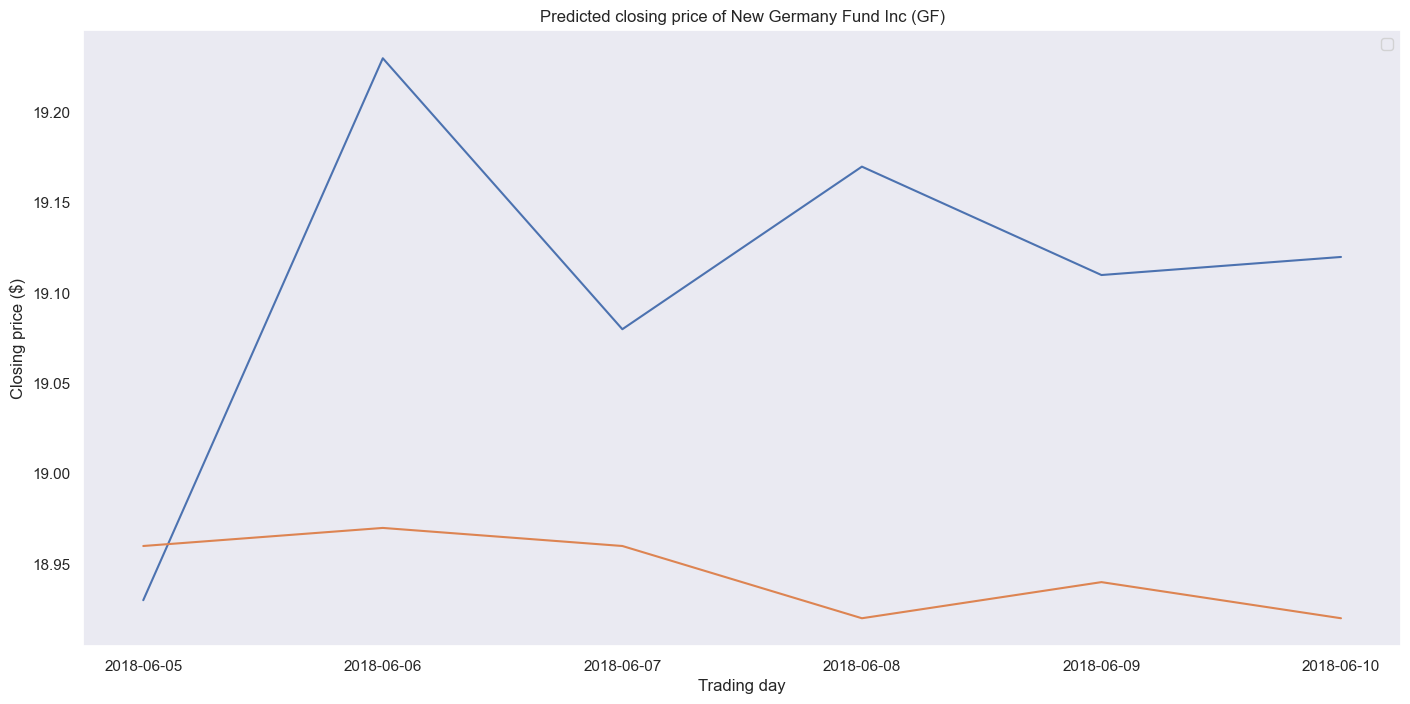

In [38]:
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.legend(loc='best')
plt.grid(False)
plt.show()

It seems that we are a bit off in our predictions. In fact, the predicted price is essentially flat, meaning that our model is probably not performing well.

Again, this is not due to our procedure, but to the fact that predicting stock prices is essentially impossible.



SARIMA Model Output
The SARIMA model was applied to forecast values for the given time series. The output below shows the actual values alongside the predicted values:

| Date       | Actual | Predicted |
|-------------|---------|-----------|
| 2018-06-05 | 18.93   | 18.96     |
| 2018-06-06 | 19.23   | 18.97     |
| 2018-06-07 | 19.08   | 18.96     |
| 2018-06-08 | 19.17   | 18.92     |
| 2018-06-09 | 19.11   | 18.94     |

Observations
- The predicted values are generally close to the actual values, indicating a good fit of the SARIMA model.
- There are some minor deviations between the actual and predicted values, which could be due to random fluctuations in the data.
- The model seems to be slightly underestimating the actual values, as the predicted values are mostly lower than the actual values.

Future Improvements
- Further tuning of the SARIMA model parameters (e.g., p, d, q, P, D, Q, S) may be necessary to improve the accuracy of the predictions.
- Incorporating additional features or variables into the model could potentially improve its performance.
- Using other time series forecasting models, such as ARIMA, ETS, or LSTM, may also be worth exploring to compare their performance with the SARIMA model.